# 글로브(GloVe)

- 글로브(Global Vectors for Word Representation)
- 카운트 기반과 예측 기반을 모두 사용하는 방법론
- 기존의 카운트 기반의 LSA(Latent Semantic Analysis)와 예측 기반의 Word2Vec의 단점을 지적하며 이를 보완한다는 목적을 가짐
- 현재까지의 연구에 따르면 단정적으로 Word2Vec와 GloVe 중 어떤 것이 더 뛰어나다고 말할 수는 없고, 이 두 가지를 전부 사용해보고 성능이 더 좋은 것을 사용하는 것이 바람직하다.

## 1. 기존 방법론에 대한 비판

- LSA는 DTM이나 TF-IDF 행렬과 같이 각 문서에서의 각 단어의 빈도수를 카운트 한 행렬이라는 전체적인 통계 정보를 입력으로 받아 차원을 축소(Truncated SVD)하여 잠재된 의미를 끌어내는 방법론이었다.
- 반면, Word2Vec는 실제값과 예측값에 대한 오차를 손실 함수를 통해 줄여나가며 학습하는 예측 기반의 방법론.

### LSA와 Word2Vec의 장,단점

- LSA는 카운트 기반으로 코퍼스의 전체적인 통계 정보를 고려하기는 하지만, 왕:남자=여왕:? 와 같은 단어 의미의 유추 작업(Analogy Task)에는 성능이 떨어진다.
<br><br>
- Word2Vec는 예측 기반으로 단어 간 유추 작업에는 LSA 보다 뛰어나지만, <br> 임베딩 벡터가 윈도우 크기 내에서만 주변 단어를 고려하기에 코퍼스의 전체적인 통계 정보를 반영하지 못 한다.
<br><br>
- GloVe는 이러한 기존 방법론들의 각각의 한계를 지적하며 LSA의 메커니즘이었던 카운트 기반의 방법과 Word2Vec의 메커니즘이었던 예측 기반의 방법론 두 가지를 모두 사용.

## 2. 윈도우 기반 동시 등장 행렬 <br> (Windows based Co-occurrence Matrix)

- 단어의 동시 등장 행렬은 행과 열을 전체 단어 집합의 단어들로 구성하고, <br> i 단어의 윈도우 크기(Window Size) 내에서 k 단어가 등장한 횟수를 i행 k열에 기재한 행렬을 말한다.

- 윈도우 크기가 N일 때는 좌, 우에 존재하는 N개의 단어만 참고하게 된다.
- 윈도우 크기가 1일 때, 아래의 텍스트를 가지고 구성한 동시 등장 행렬은 다음과 같다.

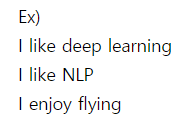

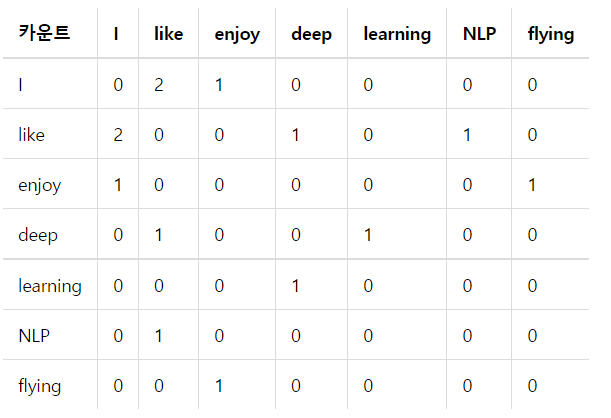

- 위 행렬은 전치(Transpose)해도 동일한 행렬이 된다는 특징이 있다.

## 3. 동시 등장 확률(Co-occurrence Probability)

- 동시 등장 확률 P(k|i)는 동시 등장 행렬로부터 특정 단어 i의 전체 등장 횟수를 카운트하고, 특정 단어 i가 등장했을 때 어떤 단어 k가 등장한 횟수를 카운트하여 계산한 조건부 확률. <br><br>

- P(k|i)에서 i를 중심 단어, k를 주변 단어라고 했을 때, 위에서 배운 동시 등장 행렬에서 중심 단어 i의 행의 모든 값을 더한 값을 분모로, i행 k열의 값을 분자로 한 값. <br><br>

- 아래의 표는 GloVe의 제안 논문에서 가져온 동시 등장 확률을 표로 정리한 하나의 예

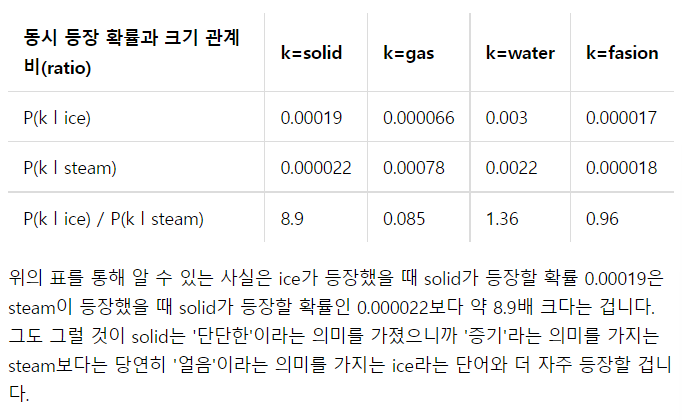

<br>

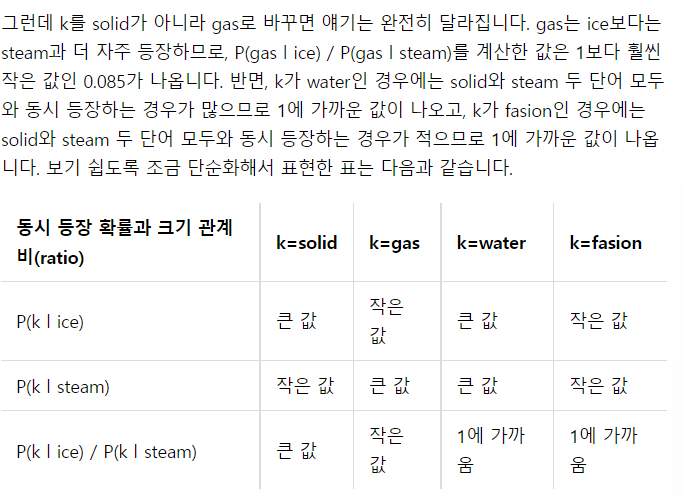

## 4. 손실 함수(Loss Function)

- 각 용어
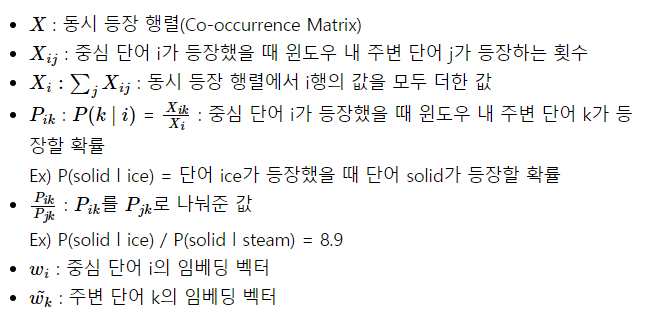

- GloVe의 아이디어를 한 줄로 요약하면 <br><b>'임베딩 된 중심 단어와 주변 단어 벡터의 내적이 전체 코퍼스에서의 동시 등장 확률이 되도록 만드는것'</b>
- 즉, 이를 만족하도록 임베딩 벡터를 만드는 것이 목표. 식으로 표현하면 다음과 같다.
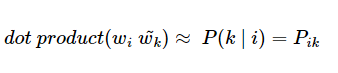
- 뒤에서 보겠지만, 더 정확히는 GloVe는 아래와 같은 관계를 가지도록 임베딩 벡터를 설계한다.
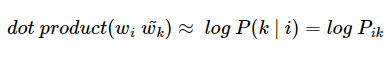

### 손실 함수 설계

- 가장 중요한 것은 단어 간의 관계를 잘 표현하는 함수여야 한다.
- 이를 위해 함서 배운 개념인 P_ik|P_jk를 식에 사용한다.
- 벡터 w_i, w_j, w_k를 가지고 어떤 함수 F를 수행하면 P_ik/P_jk가 나온다는 초기 식으로부터 전개를 시작한다.
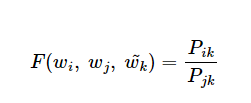

- 함수 F는 두 단어 사이의 동시 등장 확률의 크기 관계비(Ratio) 정보를 벡터 공간에 인코딩하는 것이 목적이다.
- 이를 위해 GloVe 연구진들은 w_i와 w_j 라는 두 벡터의 차이를 함수 F의 입력으로 사용하는 것을 제안한다.
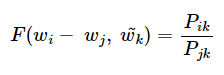
- 정리하면, 선형 공간(Linear Space)에서 단어의 의미 관계를 표현하기 위해 뺄셈과 내적을 택했다.
- 여기서 함수 F가 만족해야할 필수 조건이 있따.
    - 중심 단어 w와 주변 단어 ~w라는 선택 기준은 실제로 무작위 선택이므로 이 둘의 관계는 자유롭게 교환될 수 있도록 해야한다.
    - 이것이 성립되게 하기 위해 GloVe 연구진은 함수 F가 실수의 덧셈과 양수의 곱셈에 대해서 <b>준동형(Homomorphism)</b>을 만족하도록 한다.
    - 생소한 용어라서 말이 어려워보이는데, 정리하면 a와 b에 대해서 함수 F가 F(a+b)가 F(a)F(b)와 같도록 만족시켜야 한다. <br> 식으로 나타내면 아래와 같다.
    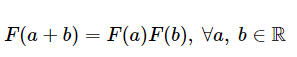

- 전개하던 GloVe 식에 따르면, 함수 F는 결과값으로 스칼라 값(P_ik/P_jk)이 나와야 한다.
- 준동형식에서 a와 b가 각각 벡터값이라면 함수 F의 결과값으로는 스칼라 값이 나올 수 없지만, a와 b가 각각 사실 두 벡터의 내적값이라고 하면 결과값으로 스칼라값이 나올 수 있다.
- 그러므로 위의 준동형식을 아래와 같이 바꿔보겠습니다. <br> 여기서 v1,v2,v3,v4는 각각 벡터값입니다. 아래의 V는 벡터를 의미한다.
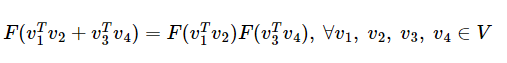

- 이제 이 준동형 식을 GloVe 식에 적용해보겠습니다. <br> 우선, 함수 F의 우변은 다음과 같이 바뀌어야 한다. <br> (아래의 도출은 많이 생략되어있음, wikidocs 가서 확인 필요)
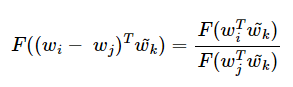
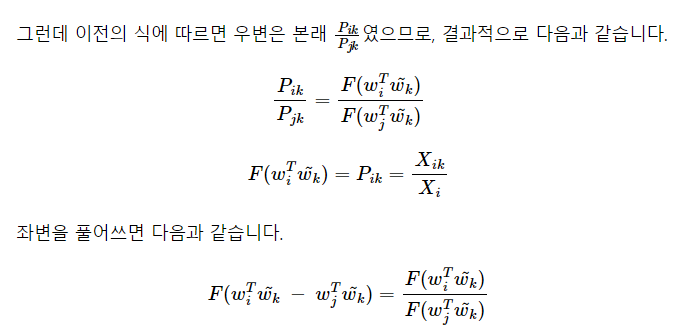
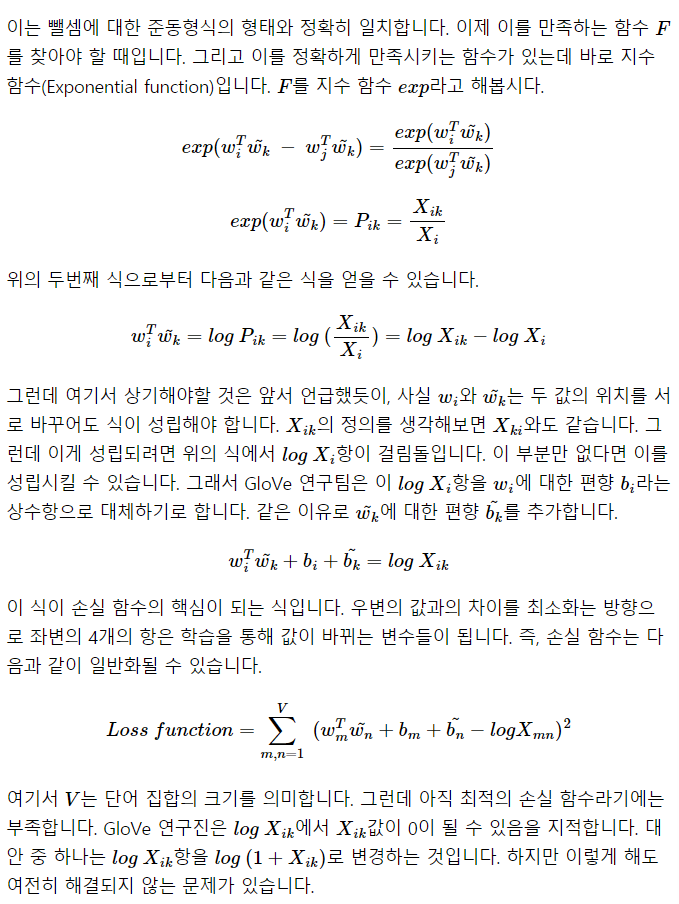
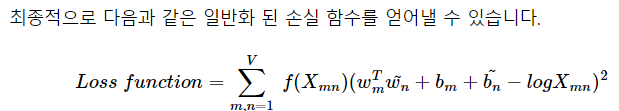